In [15]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [22]:
# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df = df[['petal length (cm)', 'petal width (cm)']]
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


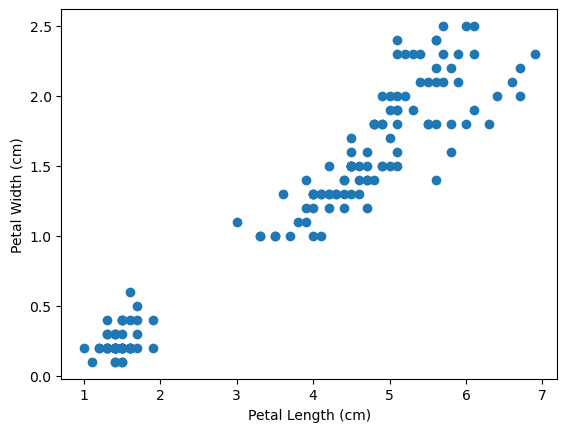

In [23]:
# Visualize raw data
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()

In [24]:
# Initial KMeans clustering
km = KMeans(n_clusters=3, random_state=42)
y_predicted = km.fit_predict(df[['petal length (cm)', 'petal width (cm)']])
df['cluster'] = y_predicted
df.head()
km.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

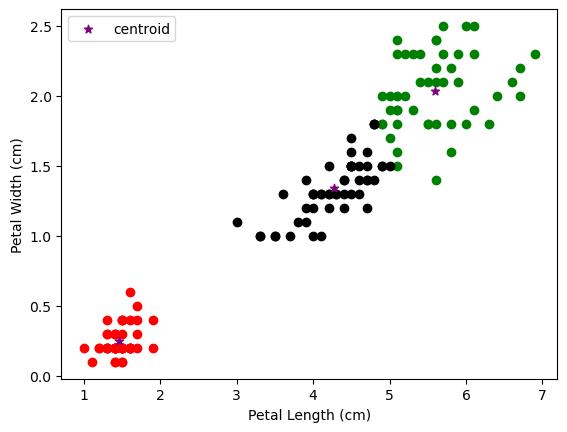

In [25]:
# Plot clusters (before scaling)
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='red')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.show()

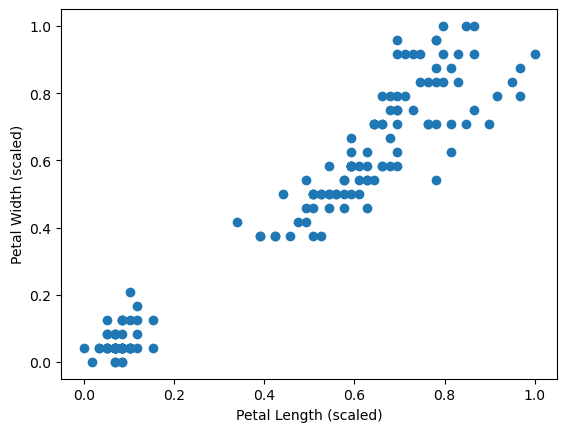

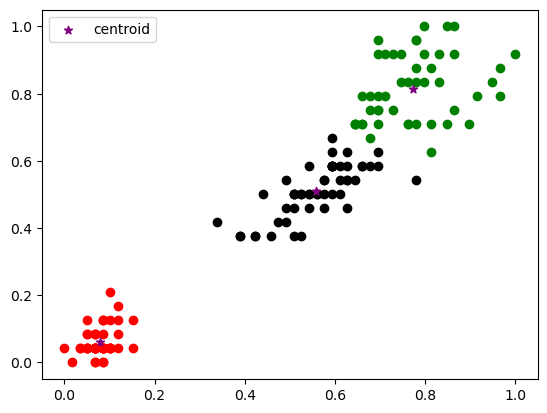

In [28]:
scaler = MinMaxScaler()
scaler.fit(df[['petal length (cm)']])
df['petal length (cm)'] = scaler.transform(df[['petal length (cm)']])

scaler.fit(df[['petal width (cm)']])
df['petal width (cm)'] = scaler.transform(df[['petal width (cm)']])
df.head()

# Visualize scaled data
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])
plt.xlabel('Petal Length (scaled)')
plt.ylabel('Petal Width (scaled)')
plt.show()

# KMeans after scaling
km = KMeans(n_clusters=3, random_state=42)
y_predicted = km.fit_predict(df[['petal length (cm)','petal width (cm)']])
df['cluster']=y_predicted
df.head()
km.cluster_centers_

# Plot scaled clusters
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='red')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()
plt.show()

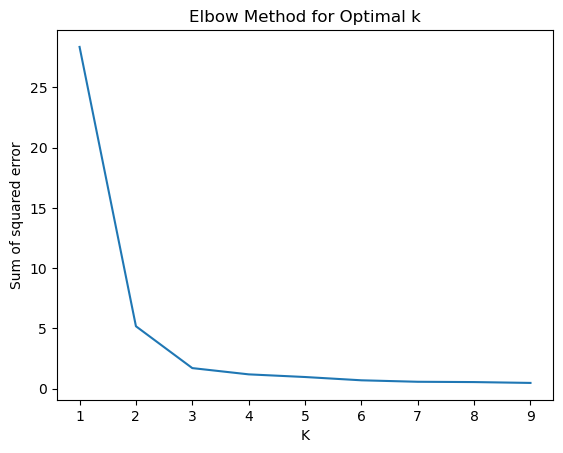

In [27]:
# --------------------- Elbow Method ---------------------
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
plt.title('Elbow Method for Optimal k')
plt.show()